In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("sonar.csv")

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [4]:
df.shape

(208, 61)

In [5]:
#df.isnull().sum()

In [6]:
#df.info()

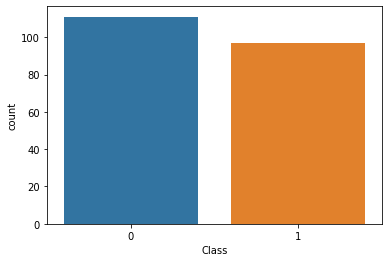

In [7]:
sns.countplot(df['Class'],data=df)

In [8]:
#df.corr()

In [9]:
#sns.pairplot(df)

In [13]:
x=df.iloc[:,:-1]
x.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044


In [18]:
y=df['Class']
y.head(2)

0    1
1    1
Name: Class, dtype: int64

In [23]:
from scipy.stats import zscore
z_score=abs(zscore(x))
print(x.shape)
df_concrete_final=x.loc[(z_score<3).all(axis=1)]
print(df_concrete_final.shape)

(208, 60)
(168, 60)


In [29]:
from scipy.stats import zscore
z_score=abs(zscore(x))
print(x.shape)
df1=x.loc[(z_score<3).all(axis=1)]
df1.shape


(208, 60)


(168, 60)

In [32]:
#df.skew()

In [30]:
for col in df1.columns:
    if df1.skew().loc[col]>.55:
      df1[col]=np.log1p(df1[col])

C:\Users\vishwaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
#df1.skew()

In [112]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
def maxf1(clf,x,y):
    maxf=0
    rs=0
    for r_state in range(40,95):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        tem=f1_score(y_test,pred)
        if tem>maxf:
            maxf=tem
            rs=r_state  
    print("maximum f1 score ",rs,'it is',maxf) 
    

In [113]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
maxf1(lr,x,y)

maximum f1 score  66 it is 0.8571428571428572


In [114]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'kernel':['linear','rbf','poly'],"C":[0.001,0.1,.5,.9,1,5,9.5,10,11]}
gd=GridSearchCV(svc,parameters,cv=5,scoring='f1')
gd.fit(x,y)
gd.best_params_

{'C': 9.5, 'kernel': 'linear'}

In [115]:
svc=SVC(kernel='linear',C=9.5)
maxf1(svc,x,y)

maximum f1 score  86 it is 0.8421052631578947


In [116]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
parameters={"n_estimators":[20,30,40,60,70]}
gd=GridSearchCV(rf,parameters,cv=5,scoring='f1')
gd.fit(x,y)
gd.best_params_

{'n_estimators': 30}

In [120]:
rf=RandomForestClassifier(n_estimators=30)
maxf1(rf,x,y)

maximum f1 score  82 it is 0.9152542372881356


In [121]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 82,test_size=0.20,stratify=y)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)

In [123]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[22  0]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.85      0.92        20

    accuracy                           0.93        42
   macro avg       0.94      0.93      0.93        42
weighted avg       0.94      0.93      0.93        42



In [124]:

from sklearn.externals import joblib
joblib.dump(svc, 'sonar_datset_svm.pkl')

['sonar_datset_svm.pkl']